### Filtro de las interfencias: Como usar

In [1]:
%matplotlib inline
import matplotlib as mpl
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import numpy.ma as ma
import filtros
from filtros import*


Automatically created module for IPython interactive environment


### cargamos los datos 

In [2]:
ruta='/home/sofia/proyecto/Algoritmo_QC/cfrad.20151107_212245.0000_to_20151107_212717.0000_RMA1_SUR.nc'
radar = pyart.io.read(ruta)

## Funcion interf() 
### filtrados de interferencias wif

#### Parametros de entrada:

* radar: objeto radar pyart

* var: str del nombre de la variable de Reflectividad

#### Salida: 

* MaskedArray del tamaño de los datos contenidos en el objeto radar, con la información de reflectividad corregida 


In [3]:
r=interf(radar,'TH')

#### Si queremos agregar la variable al objeto radar:

In [4]:
radar.add_field_like('TH','TH_cor',r)  

## Funcion scp()

### elimina los puntos aislados de una variable

#### Parametros de entrada:

* radar: objeto radar pyart

* var: variable a corregir

* umbral: cantidad de vecinos NAN en una ventana de 3x3 necesarios para ser considerado NAN. Default:6  

#### Salida:

* MaskdArray del tamaño de los datos contenidos en el objeto radar, con la informacion de la varible a trabajar corregida




In [5]:
d=scp(radar,'TH_cor')

#### Agregamos la variable al objeto radar

In [6]:
radar.add_field_like('TH_cor','TH_cor_scp',d)  

#### Grafico

/home/sofia/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/sofia/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


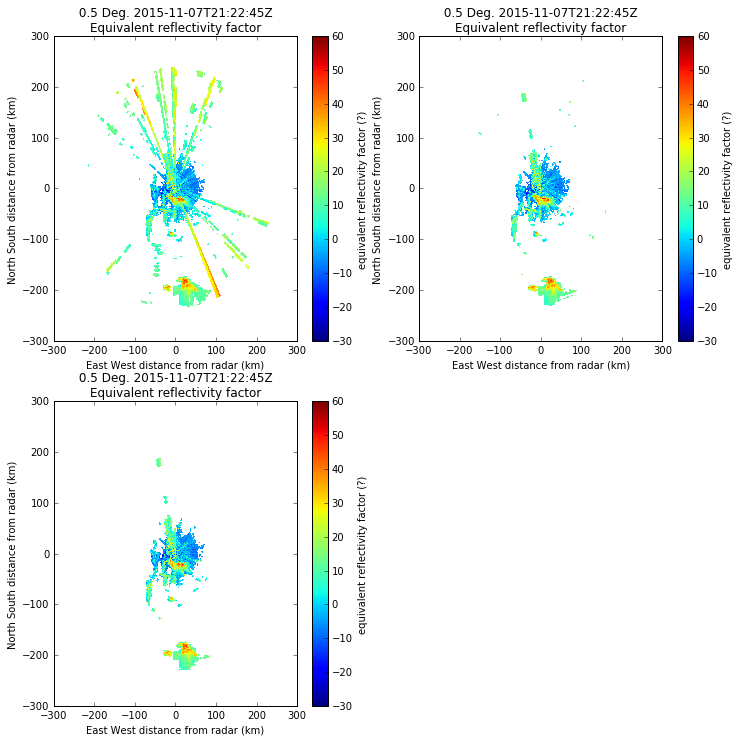

In [7]:
display = pyart.graph.RadarMapDisplay(radar)

f = plt.figure(figsize = [12,12])
plt.subplot(2,2,1) 
display.plot_ppi('TH',vmin=-30,vmax=60,cmap='jet')
plt.subplot(2,2,2) 
display.plot_ppi('TH_cor',vmin=-30,vmax=60,cmap='jet')
plt.subplot(2,2,3) 
display.plot_ppi('TH_cor_scp',vmin=-30,vmax=60,cmap='jet')